# Try Not To Overfit;
## an analysis of Don't Overfit! data using data science methods


## Data Exposition and Documentation

I used a single CSV data file, labeled overfitting.csv, throughout the course of this project.

The data file contains 20000 rows of data, each with a unique identifier in the column "case_id" numbered in integers from 1 to 20000 inclusive. Out of these identified rows, only rows 1 through 250 inclusive were 'training' data.

Each case has values for 200 distinct variables, labeled in ascending order from var_1 to var_200. These values are numerical and are real numbers, recorded to 3 decimal places, between 0 and 1 inclusive.

The data file also contains three "Target" columns, representing the sole outcome (either 1 or 0) derived from the data:
    - Target_Practice, with the outcomes for all 20000 rows
    - Target_Leaderboard, with only the outcomes for the training data
    - Target_Evaluate

For purposes of generating the model, I only used the Target_Practice outcomes.



## What I intend to find from the data:

- Formation of equation which derived the data and outcomes
- Using said equation in Bayesian analysis as model (simplest method, prevents data from fitting too tightly)
    - Formation of model and likelihood
    - Formation of prior distribution
    - Bayes' rule ==> formation of posterior distribution as result of analysis

## What I know so far for methodology
- fewer variables -- pick the most relevant of the most relevant
- Source of Relevance: heatmap?
- Since I'm using Bayesian analysis from the start, the bulk of the work lies in forming the equation
- Usage of forum information - is it acceptable in the foreground?

## Data Exploration and Visualization

We visibly have a classification problem here - the outcome is a simple 1 or 0. 
Possible techniques to be used: Naive Bayes, SVM, discrimination algorithm

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# imports and visualization tools

df = pd.read_csv('overfittingALT.csv', dtype=None)

In [27]:
TRG = df.head(250)
# formation of training data
TRF = df.sample(n=10, random_state=1)
# formation of subset to get a heatmap out
TRH = TRG.Target_Practice


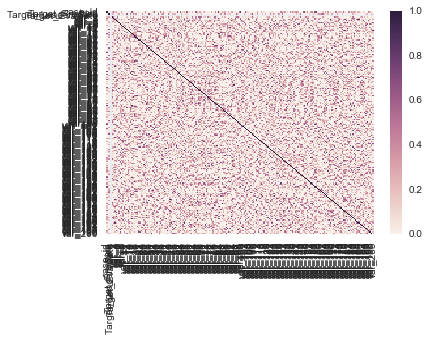

In [29]:
sns.heatmap(TRF.corr(), vmin=0, vmax=1)

# (Still attempting to find relevance as of date of publication/)


In [35]:
TRC = TRF.cov()
TRC

case_id  train  Target_Practice  \
case_id             32277672.677778      0     -1042.311111   
train                      0.000000      0         0.000000   
Target_Practice        -1042.311111      0         0.266667   
Target_Leaderboard         0.000000      0         0.000000   
Target_Evaluate            0.000000      0         0.000000   
var_1                    287.912800      0         0.042156   
var_2                    824.709900      0         0.012800   
var_3                    238.895022      0        -0.055178   
var_4                    498.279333      0        -0.094889   
var_5                    -29.198733      0         0.021089   
var_6                   -295.254256      0         0.038044   
var_7                    -97.283444      0         0.003667   
var_8                    359.373778      0        -0.053222   
var_9                     26.349156      0         0.019867   
var_10                  -542.909711      0        -0.040089   
var_11                  -792.090056      0        -0.005222   
var_12                  -856.774189      0         0.080289   
var_13                   154.335289      0        -0.012867   
var_14                  -991.349089      0        -0.046178   
var_15                  -202.626967      0         0.058844   
var_16                  1085.786289      0        -0.049311   
var_17                   177.459133      0         0.055378   
var_18                  -228.565000      0         0.023000   
var_19                  -360.113589      0         0.053156   
var_20                  -937.460356      0        -0.014044   
var_21                   146.789833      0        -0.060000   
var_22                  -275.380678      0        -0.024244   
var_23                   -60.455267      0        -0.003978   
var_24                  -108.358100      0         0.041911   
var_25                  -360.826467      0         0.006956   
...                             ...    ...              ...   
var_171                  -54.896967      0        -0.010711   
var_172                  939.989289      0        -0.069978   
var_173                 -163.097489      0         0.049133   
var_174                  499.206500      0        -0.065444   
var_175                  294.051089      0        -0.027711   
var_176                  276.699244      0        -0.067511   
var_177                -1378.475811      0         0.032044   
var_178                  785.131889      0        -0.029556   
var_179                  192.946778      0        -0.022889   
var_180                  -32.891867      0        -0.019733   
var_181                 -332.884122      0         0.012089   
var_182                  672.639778      0        -0.051556   
var_183                  102.214500      0         0.000111   
var_184                  511.904567      0        -0.048200   
var_185                  428.276733      0         0.043689   
var_186                  710.460467      0        -0.072733   
var_187                  331.842211      0         0.020756   
var_188                 -412.244344      0        -0.002911   
var_189                  462.773056      0        -0.102000   
var_190                  400.834900      0        -0.095533   
var_191                   90.572022      0        -0.020622   
var_192                 -254.328600      0        -0.016756   
var_193                  252.015800      0        -0.114733   
var_194                 -409.007567      0        -0.028022   
var_195                 -239.244978      0         0.022600   
var_196                  -28.344011      0         0.049644   
var_197                  517.514889      0        -0.079000   
var_198                  557.610678      0        -0.039200   
var_199                 -834.667756      0         0.035267   
var_200                  -65.864511      0         0.007533   

                    Target_Leaderboard  Target_Evaluate       var_1  \
case_id                              0            

In [43]:
np.linalg.eig(TRC)
# Generating eigenvalues. 

(array([  3.22776746e+07 +0.00000000e+00j,
          2.47895612e+00 +0.00000000e+00j,
          2.21477240e+00 +0.00000000e+00j,
          1.99670440e+00 +0.00000000e+00j,
          1.84895257e+00 +0.00000000e+00j,
          1.81056914e+00 +0.00000000e+00j,
          1.67944494e+00 +0.00000000e+00j,
          1.33181172e+00 +0.00000000e+00j,
          1.43727078e+00 +0.00000000e+00j,
         -2.34140068e-15 +0.00000000e+00j,
          2.90702081e-16 +1.27718141e-16j,
          2.90702081e-16 -1.27718141e-16j,
          1.67798209e-16 +2.21547730e-16j,
          1.67798209e-16 -2.21547730e-16j,
          2.08734439e-16 +1.67874909e-16j,
          2.08734439e-16 -1.67874909e-16j,
          8.30442623e-18 +2.64225565e-16j,
          8.30442623e-18 -2.64225565e-16j,
          8.48505789e-17 +2.36175965e-16j,
          8.48505789e-17 -2.36175965e-16j,
          2.19829223e-16 +7.54882070e-17j,
          2.19829223e-16 -7.54882070e-17j,
         -2.74851071e-16 +0.00000000e+00j,
         -2

In [12]:
TRM = TRG.mean()
# TRM
#Finding the mean for each variable

In [13]:
TRS = TRG.std()
#TRM
# standard deviation

## Modelling and critical model selection

Reducing dimensionality of the model by only selecting the most relevant variables.
Relevance was determined through the above heatmap, and 



- Deriving the equation
- Why did you choose the model?
- 